Retornos geralmente não seguem distribuição normal.
Devemos olhar para medidas de assimetria e curtose, que podem ser calculadas usando 
o 3 e 4 momentos da função de distribuição e a variância.

Distribuição normal tem S = 0 e k = 3 (assimetria e curtose)
Segundo professor, valores de S < 0 significa que a chance de ter retorno menor que a média é maior que de superar a média.
Valores de k > 3 indicam que a curva é menos achatada

Teste estatístico para ver se uma distribuição se aproxima da normal - Chi Quadrado

$$ JB = \frac{n}{6}(S^{2} + \frac{(K-3)^{2}}{4}) $$

Como distribuição dos retornos de ativos não é normal, vamos analisar outras medidas de risco 

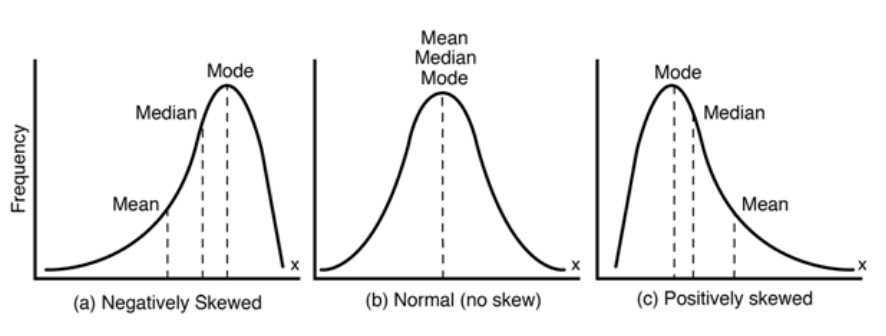

In [2]:
from IPython.display import Image
Image('pics/Captura de tela de 2022-09-13 20-38-31.png')

# Building Modules in Python
Lembrar sempre de fazer:

%load_ext autoreload

%autoreload 2


In [3]:
import pandas as pd

In [28]:
import edhec_risk_kit as erk

In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# o modo 2 do autoreload vai, sempre que encontrar um import, vai importá-lo de novo
%autoreload 2

In [21]:
returns = erk.get_ffme_returns()

In [22]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [25]:
# testando módulo
erk.drawdown(returns['SmallCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

Algumas métricas para medir risco considerando curtose e assimetria.

semi-deviation: considera só o desvio padrão para o que fica abaixo da média, mas não mede o quanto potencialmente investidor pode perder

Value-at-Risk: perda máxima que um portifólio pode ter com dada probabilidade
    definir nível de confiança
    definir período de observação (mensal, diário)

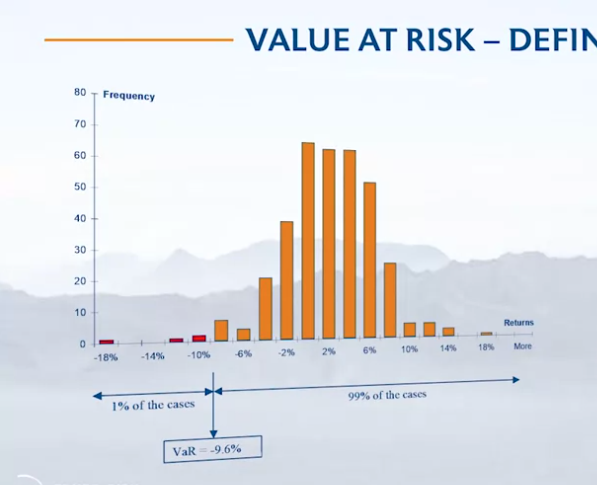

In [27]:
Image('pics/Captura de tela de 2022-09-13 21-12-24.png')

VaR é sempre medido postiviamente, interpretado diretamente como uma perda

VaR = 9,6%

Posso olhar para VaR condicionado -> CVaR

A ideia é olhar para os retornos que estão abaixo do VaR. (perder muito?)

$$  CVaR = - E(R|R\le - VaR) $$


Dica estatística: quando encontrar 
$$ f_{r}(x) $$
é a distribuição de retornos do ativo x


e quando encontrar 
$$ F_{r}(x) $$
é a distribuição acumulada de retornos do ativo x 

# Lab Session Deviation from Normality

In [36]:
hfi = erk.get_hfi_returns()

In [30]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


Vamos ver a assimetria -> Se média for maior que mediana, negative skewness.

In [35]:
# média é maior que variância?
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()],
         axis='columns')

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


Lembre a fórmula da skewness:

$$ S(R) = \frac{E[(R - E(R))^{3}]}{\sigma_R^3} $$

Essa fórmula significa:
Tire a média de todos os retornos (R - E(R)), eleve ao cubo, e faça a média desses valores elevados ao cubo (E(x)), depois divida pela volatilidade ao cubo.

In [54]:
skew = erk.skewness(hfi)

In [41]:
skew.sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [48]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [49]:
import numpy as np

In [51]:
# np.random.normal mean=0, stdev = .15 e shift+TAB mostra dica da função
normal_rets = np.random.normal(0, .15, size=(263,1))

In [52]:
erk.skewness(normal_rets)

0.027128447224564558

In [53]:
scipy.stats.skew(normal_rets)

array([0.02712845])

Para analisar a curtose é semelhante:

$$ S(R) = \frac{E[(R - E(R))^{4}]}{\sigma_R^4} $$

In [55]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [63]:
# curtose normal, próxima de 3
erk.kurtosis(normal_rets)

3.064152462827387

In [59]:
# scipy calcula excesso de curtose, logo será proximo de 0
scipy.stats.kurtosis(normal_rets)

array([0.06415246])

In [61]:
# Teste Chi-Quadrado
# Estou mais interessado no segundo número, o valor p,
# Valor p é probabilidade de aceitar a hipótese do teste H1
scipy.stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=0.07735870035782923, pvalue=0.9620591437862966)

In [62]:
# Queria ver quais índices se aproximam da normal, mas tenho que
# especificar as colunas
scipy.stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

In [65]:
erk.is_normal(hfi['Emerging Markets'])

False

In [67]:
# na celula de cima precisei especificar a coluna.
# com aggregate do pandas consigo fazer com que a função dentro
# do parentesis seja executada coluna por coluna
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [69]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [70]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [72]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

# Estimando VaR

1 - Metodologia histórica: olha para a distribuição histórica e tira 1% dos piores
    Sensível ao periodo analisado

2 - Parametric Gaussian Methodology
    Assume retornos normais, só precisa usar desvio padrão e média.
    Z será a probabilidade:
    $$ Pr(\frac{R_{p}-\mu_{p}}{\sigma_{p}}\le z_{\alpha}) = \alpha $$
    


ou: 
$$  Pr(R\le \mu_{p} + z_{\alpha} \sigma_{p}) = \alpha  $$


Calculando o VaR (tirando piores resultados) temos:

$$  VaR = -(\mu+z_\alpha \sigma)  $$

Podemos assumir que o retorno segue outras distribuições, como Loggamma, Student, etc. 
Todas elas incorrem ao risco de especificação

# Cornish-Fisher VaR

Modifica o z usando z_dist_norm mas com correções, que usam os valores de curtose e assimetria.

Com isso:

$$  VaR = -(\mu+ẑ_{\alpha}\sigma)  $$

Sendo que:

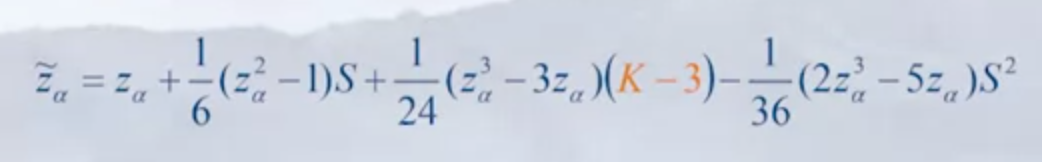

In [74]:
Image("pics/Captura de tela de 2022-09-15 15-18-14.png")

In [104]:
# tentar fazer essa conta dar certo
z = -1.65+1/6*(-1.65**2-1)*(-1.2)+1/24*((-1.65)**3-3*(-1.65))*(6-3)-1/36*(2*(-1.65)**3-5*-1.65)*(-1.2)**2


Escolha de método de VaR é um trade off entre risco de amostra e risco de modelagem

# Lab Session - Semi deviation, VaR e CVaR

In [105]:
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
hfi = erk.get_hfi_returns()

In [130]:
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [108]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [109]:
# esse desvio padrão pega só os desvios dos retornos abaixo de zero
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [112]:
# depois de incluir semi deviation no toolkit
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

<AxesSubplot:>

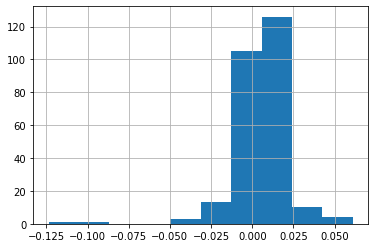

In [131]:
hfi['Convertible Arbitrage'].hist()

In [133]:
np.percentile(hfi, 100, axis=0)

array([0.0611, 0.0691, 0.0504, 0.123 , 0.0253, 0.0442, 0.0365, 0.0738,
       0.0745, 0.0272, 0.0392, 0.2463, 0.0666])

  # VaR and CVaR

- Historic VaR
- Parametric VaR (Gaussian)
- Modified Cornish-Fisher

In [127]:
# 5% dos retornos do ativo Convertible Arvitrage estão abaixo de
# -0.01576

np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [141]:
def var_historic(r, level=5):
    """
    VaR Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level) 
    elif isinstance(r,pd.Series):
        return -np.percentile(r, level) #negative because we are
                                        #looking at loss
    else:
        raise TypeError('Expected r to be Series or DataFrame')
        

In [140]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [144]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [145]:
from scipy.stats import norm

In [148]:
# norm.ppf retorna Z score associado ao level (level=0.05 Z=1.64)
z = norm.ppf(.05)

In [160]:
# value at risk with standard formula
-(hfi.mean()+z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [162]:
# VaR using toolkit
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

# Cornish-Fisher

In [182]:
# how to adjust VaR? R: See toolkit
erk.var_gaussian(hfi,modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

In [187]:
var_list = [erk.var_gaussian(hfi), 
            erk.var_gaussian(hfi, modified=True),
            erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gausian', 'Cornish-Fisher', 'Historic']

<AxesSubplot:title={'center':'EDHEC Hedge Fund Indices: VaR'}>

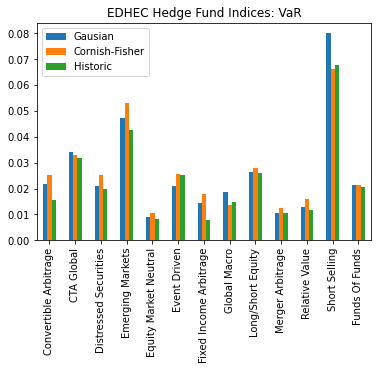

In [189]:
comparison.plot.bar(title='EDHEC Hedge Fund Indices: VaR')

# BeyondVar (CVar)

In [197]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

### Como interpretar CVar?
Se o retorno estiver entre os 5% (level) mais baixos, a média dos retornos (retorno esperado) é -3.6% ao mes para o primeiro ativo